In [66]:
from mpl_toolkits import mplot3d
from scipy.interpolate import CubicSpline
import scipy.io as scio
import numpy as np 
import matplotlib.pyplot as plt
data = scio.loadmat('tissue6.mat')

In [88]:
# Look at imported data
for key, value in data.items():
    print(key)

__header__
__version__
__globals__
x_c
IDX
spC
dermis
dye
bcc
ID
fat
epi
map_t6
map_t6_c
map_t6_svd
tissue_t6
tissue_t6_1
tissue_t6_2
map_t6_c_1
tissue


(200, 400)


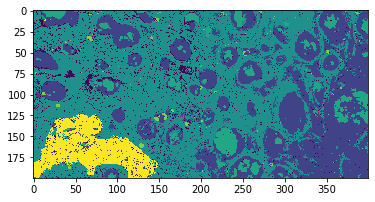

In [89]:
plt.imshow(data['tissue_t6'])
print(data['tissue_t6'].shape)

In [121]:
SVD = data['map_t6_svd']  # (100, 200, 1024)
c   = data['map_t6_c']    # (100, 200, 1024)
t6  = data['map_t6']     # (100, 200, 1024)
print(data['map_t6'].shape)

(200, 400, 1024)


In [122]:
# Construct data matrix
#   Each row: point in space
#   Each column: spectra
D = np.zeros((80000,1024))
for i in range(200):
    for j in range(400):
        index = i*400 + j
        D[index,:] = t6[i,j,:]

In [ ]:
V, W, U = np.linalg.svd(D)
print(U.shape, W.shape, V.shape)
# V:(80000, 80000)
# W:(1024)
# U:(1024, 1024)

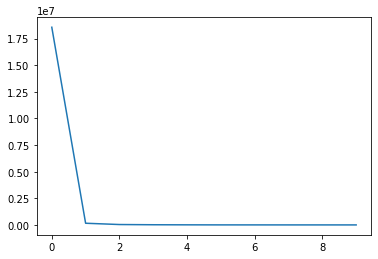

In [98]:
plt.plot(W[0:10])

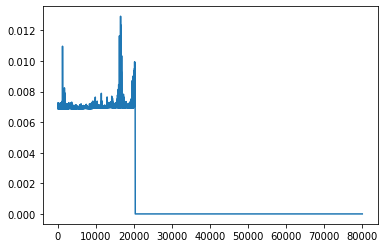

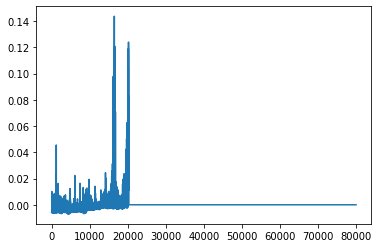

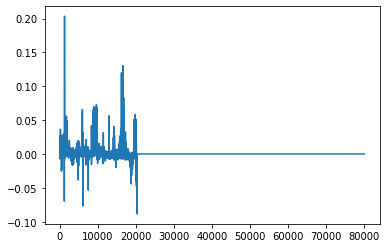

In [118]:
plt.figure()
plt.plot(V[:,0]*-1)
plt.figure()
plt.plot(V[:,1]*-1)
plt.figure()
plt.plot(V[:,2]*-1)

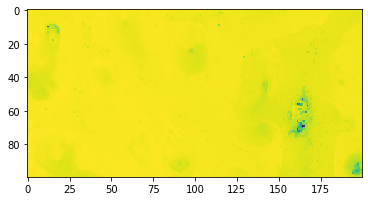

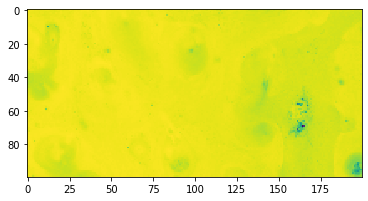

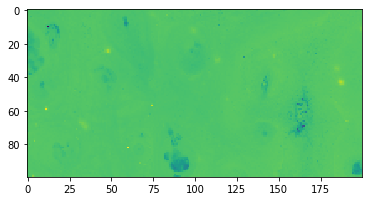

In [120]:
V0 = np.zeros((200,100))
V1 = np.zeros((200,100))
V2 = np.zeros((200,100))

for i in range(200):
    for j in range(100):
        index = i*100 + j
        V0[i,j] = V[index,0]
        V1[i,j] = V[index,1]
        V2[i,j] = V[index,2]
        
plt.figure()
plt.imshow(V0.transpose())
plt.figure()
plt.imshow(V1.transpose())
plt.figure()
plt.imshow(V2.transpose())

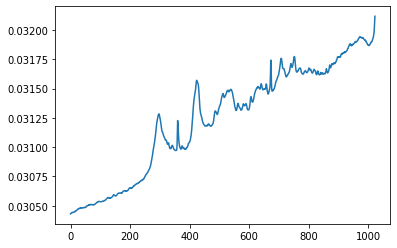

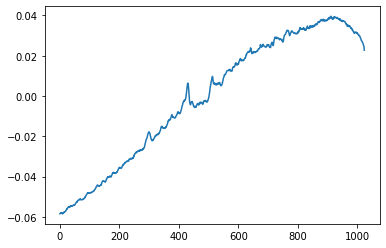

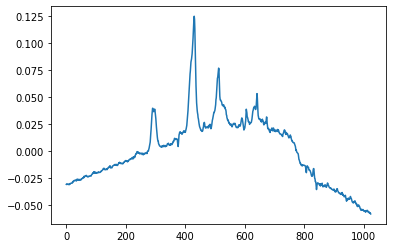

In [116]:
plt.figure()
plt.plot(U[0,:]*-1)
plt.figure()
plt.plot(U[1,:]*-1)
plt.figure()
plt.plot(U[2,:]*-1)